**Importing the Dataset and splitting it into training and testing sets. Also plotting the co-relation matrix.**

Shape of X: (992, 1)
Shape of y: (992,)


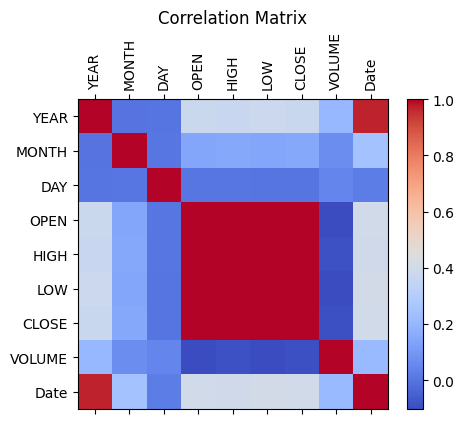

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/data.csv')

# Combine YEAR, MONTH, and DAY into a datetime column
df['Date'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

# Extract the features and the target variable
X = df['Date'].astype(int).values.reshape(-1, 1)  # Convert datetime to timestamp and reshape to 2D array
y = df["CLOSE"].values

# Verify shapes
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(5, 4))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()



**Implementation Using Packages:**

Printing Results of Packaged Implementation:
Mean Squared Error: 26230.31296267345
R^2 Score: 0.15778720279474823


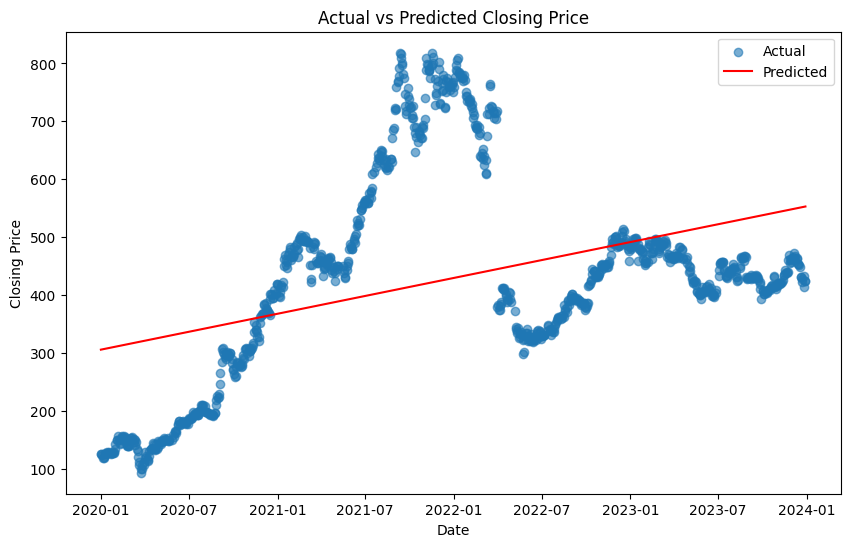

In [11]:
from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Printing Results of Packaged Implementation:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], y, alpha=0.6, label='Actual')
plt.plot(df['Date'], y_pred, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Price')
plt.legend()
plt.show()

**Manual Implementation of Linear Regression:**

In [13]:
def manual_linear_regression(X_train, y_train, X_test, y_test, X, y, df):
    # Step 1: Add a column of ones to X_train and X_test to account for the intercept term
    X_train_augmented = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test_augmented = np.c_[np.ones(X_test.shape[0]), X_test]

    # Step 2: Compute the coefficients using the normal equation (X^T * X)^(-1) * X^T * y
    theta = np.linalg.inv(X_train_augmented.T @ X_train_augmented) @ X_train_augmented.T @ y_train.reshape(-1, 1)

    # Step 3: Make predictions
    y_pred_train = X_train_augmented @ theta
    y_pred_test = X_test_augmented @ theta
    y_pred_all = np.c_[np.ones(X.shape[0]), X] @ theta  # Predicting on all data

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Print the results
    print("Printing Results of Manual Implementation:")
    print(f"Mean Squared Error: {mse_test}, R^2 Score: {r2_test}")


    # Plotting actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Date'], y, alpha=0.6, label='Actual')
    plt.plot(df['Date'], y_pred_all, color='red', label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('Actual vs Predicted Closing Price (Manual Linear Regression)')
    plt.legend()
    plt.show()



**Executing Manually Implemented Model:**

Printing Results of Manual Implementation:
Mean Squared Error: 27892.223044232956, R^2 Score: 0.12184744859004726


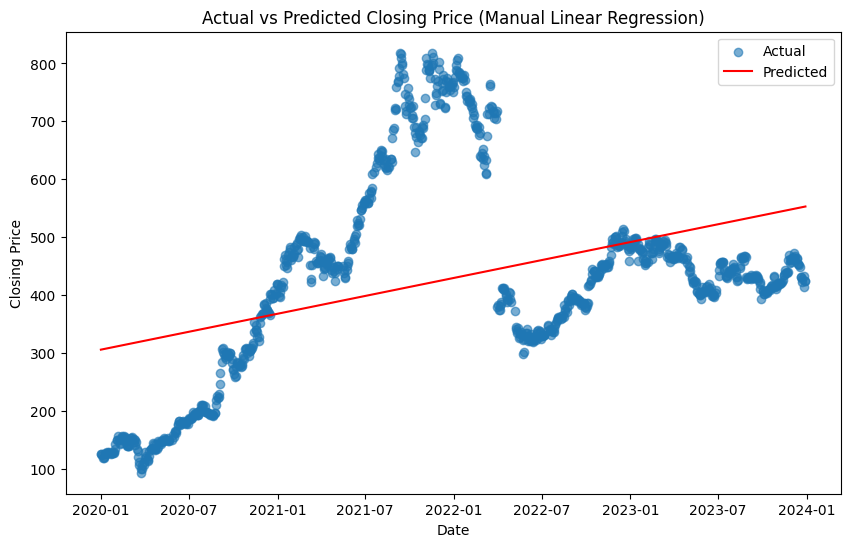

In [14]:
manual_linear_regression(X_train, y_train, X_test, y_test, X, y, df)

**Analysis:**

    Mean Squared Error (MSE):
        The packaged implementation has a lower MSE (26230.31) compared to the manual implementation (27892.22). A lower MSE indicates that the packaged model's predictions are closer to the actual values on average.

    R-squared (R²) Score:
        The packaged implementation has a higher R² score (0.1578 or 15.78%) compared to the manual implementation (0.1218 or 12.18%). R² score measures the proportion of the variance in the dependent variable (closing price) that is predictable from the independent variables (date in this case). A higher R² score indicates that more variance is explained by the model, suggesting better fit.